In [4]:
import numpy as np
import matplotlib.pyplot as plt

X = []
Y = []
path = '../ex1data1.txt'
with open(path) as f:
    for line in f:
        line = line.split(',')
        X.append([float(line[0])])
        Y.append([float(line[1])])
X = np.array(X)
Y = np.array(Y)
# print(X)
# print(X.shape) #97*1

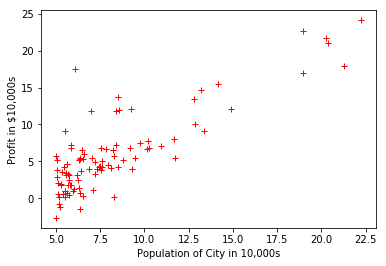

In [5]:
plt.plot(X, Y, 'r+')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
# plt.legend()
plt.show()

In [6]:
ones = np.ones((X.shape[0], 1))
X_nor = np.concatenate((ones, X), axis = 1)
print(X_nor.shape)

(97, 2)


In [7]:
def computeCost(theta, x, y):
    cost = (x.dot(theta) - y) ** 2
    return np.sum(cost) / (2*x.shape[0])

In [58]:
def GD(theta_init, x, y, lr, ite):
    theta = theta_init
    for it in range(ite):
        theta = theta - lr * (x.T.dot(x.dot(theta) - y)) / x.shape[0]
#         if it%100 == 0:
#             print(computeCost(theta, x, y))
    return theta
        
        
        

In [9]:
theta_init = np.zeros((2,1))
ite = 1500
lr = .01

In [59]:
theta_op = GD(theta_init, X_nor, Y, lr, ite)
print(theta_op)

[[-3.63029144]
 [ 1.16636235]]


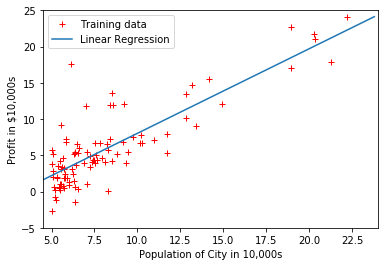

In [11]:
plt.plot(X, Y, 'r+', label='Training data')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')


xplot = np.arange(0, 24, .2)
yplot = theta_op[0] + xplot * theta_op[1]
plt.plot(xplot, yplot, label='Linear Regression')

plt.legend()
plt.axis([4.5,24,-5,25])
plt.show()

In [12]:
print(computeCost(theta_init, X_nor, Y))

32.072733877455676


In [13]:
print(computeCost(theta_op, X_nor, Y))

4.483388256587726


In [76]:
tt0plot = np.arange(-10, 10, .2)
tt1plot = np.arange(-1, 4, .2)
# print(tt0plot)
print(tt0plot.shape)
print(tt1plot.shape)

# tt = []
costplot = []
# tt = np.array([tt0plot, tt1plot])
for i in tt0plot:
    for j in tt1plot:
        tt = [i, j]
        costplot.append(computeCost(tt, X_nor, Y))

tt0plot, tt1plot = np.meshgrid(tt0plot, tt1plot)
costplot = np.array(costplot).reshape(tt0plot.shape)

print(costplot.shape)
# Z = computeCost(tt, X_nor, Y)
# from mpl_toolkits.mplot3d import axes3d
# fig = plt.figure()
# ax = fig.gca(projection='3d')
# cset = ax.contourf(tt0plot, tt1plot, Z, cmap=blue)
# plt.show()

(100,)
(25,)
(25, 100)


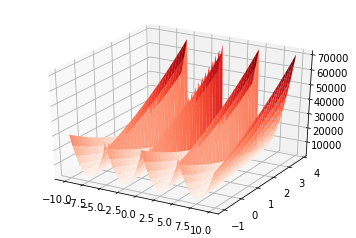

In [77]:
# costplot = np.array(costplot)
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure()
ax = fig.gca(projection='3d')
cset = ax.plot_surface(tt0plot, tt1plot, costplot, cmap='Reds')
# cset = ax.contourf(tt0plot, tt1plot, costplot)
plt.show()